In [2]:
import pickle
import warnings
warnings.simplefilter("ignore")

latest_dataset = "Amazon_Digital_Music"

with open(f'sliding/result_{latest_dataset}_BPR.pickle', 'rb') as f:
    results = pickle.load(f)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

def flatten_dict(nested_dict):
    res = OrderedDict()
    if isinstance(nested_dict, dict):
        for k in nested_dict:
            if k in ["best_valid_score", "valid_score_bigger", "best_valid_result"]:
                continue
            flattened_dict = flatten_dict(nested_dict[k])
            for key, val in flattened_dict.items():
                key = list(key)
                key.insert(-1, k)
                res[tuple(key)] = val
    else:
        res[()] = nested_dict
    return res

df = pd.DataFrame(pd.Series(flatten_dict(results)))

unstacked = df.unstack(level=1)

sorted_table = unstacked.unstack().unstack().T.droplevel(0).reorder_levels([2,0,1]).sort_index()
sorted_table = sorted_table.dropna()
sorted_table = pd.DataFrame(sorted_table.stack())
sorted_table.columns = ["val"]
measure_name = sorted(list(set([tup[2] for tup in sorted_table.index])))
measure_name

['AI-D_ori@5',
 'Ent_our@5',
 'FSat_ori@5',
 'FSat_our@5',
 'Gini-w_ori@5',
 'Gini-w_our@5',
 'Gini_ori@5',
 'Gini_our@5',
 'HR@5',
 'II-D_ori@5',
 'Jain_ori@5',
 'Jain_our@5',
 'MAP@5',
 'MRR@5',
 'NDCG@5',
 'P@5',
 'QF_ori@5',
 'QF_our@5',
 'R@5',
 'VoCD_ori@5']

In [4]:
thetable = sorted_table.unstack()

In [5]:
thetable

val                                \
                                            1-5       2-6       3-7       4-8   
Amazon_Digital_Music BPR AI-D_ori@5    0.000002  0.000002  0.000002  0.000002   
                         Ent_our@5     0.772748  0.784006  0.792304  0.799107   
                         FSat_ori@5    0.191080  0.199429  0.203234  0.205770   
                         FSat_our@5    0.190652  0.199006  0.202813  0.205351   
                         Gini-w_ori@5  0.824213  0.810571  0.800850  0.792890   
...                                         ...       ...       ...       ...   
ml-1m                BPR P@5           0.061279  0.057436  0.054919  0.052136   
                         QF_ori@5      0.354702  0.371938  0.387360  0.397641   
                         QF_our@5      0.353725  0.370987  0.386432  0.396729   
                         R@5           0.042132  0.038383  0.036490  0.034359   
                         VoCD_ori@5    0.678732  0.678760  0.676633  0.675627   

                                                 
                                            5-9  
Amazon_Digital_Music BPR AI-D_ori@5    0.000002  
                         Ent_our@5     0.804414  
                         FSat_ori@5    0.206405  
                         FSat_our@5    0.205985  
                         Gini-w_ori@5  0.786215  
...                                         ...  
ml-1m                BPR P@5           0.050480  
                         QF_ori@5      0.407318  
                         QF_our@5      0.406420  
                         R@5           0.032329  
                         VoCD_ori@5    0.674990  

[120 rows x 5 columns]

In [6]:
thetable.loc[["lastfm","ml-1m"]]

val                                        
                              1-5       2-6       3-7       4-8       5-9
lastfm BPR AI-D_ori@5    0.000025  0.000020  0.000017  0.000015  0.000014
           Ent_our@5     0.651699  0.672741  0.688917  0.700558  0.709952
           FSat_ori@5    0.169678  0.178533  0.188098  0.194120  0.196954
           FSat_our@5    0.168204  0.177076  0.186657  0.192690  0.195529
           Gini-w_ori@5  0.917148  0.906212  0.895736  0.887349  0.880160
           Gini-w_our@5  0.918460  0.907508  0.897017  0.888618  0.881419
           Gini_ori@5    0.910421  0.899769  0.890473  0.883035  0.876367
           Gini_our@5    0.906125  0.894737  0.884798  0.876847  0.869718
           HR@5          0.482517  0.391070  0.332437  0.286175  0.252824
           II-D_ori@5    0.000877  0.000877  0.000877  0.000877  0.000877
           Jain_ori@5    0.059708  0.071378  0.081729  0.090054  0.096479
           Jain_our@5    0.059150  0.071064  0.081631  0.090131  0.096691
           MAP@5         0.123879  0.082281  0.064287  0.052808  0.042842
           MRR@5         0.320719  0.230635  0.190586  0.160516  0.129460
           NDCG@5        0.187184  0.132400  0.106869  0.089181  0.074106
           P@5           0.129102  0.095750  0.078537  0.065627  0.056805
           QF_ori@5      0.311017  0.328728  0.343606  0.355296  0.373362
           QF_our@5      0.309794  0.327537  0.342441  0.354152  0.372250
           R@5           0.185700  0.137386  0.111888  0.094020  0.081469
           VoCD_ori@5    0.606393  0.607355  0.606849  0.604587  0.600442
ml-1m  BPR AI-D_ori@5    0.000021  0.000017  0.000014  0.000013  0.000012
           Ent_our@5     0.651606  0.671955  0.686391  0.697028  0.706142
           FSat_ori@5    0.153614  0.160871  0.164197  0.172362  0.179317
           FSat_our@5    0.152332  0.159600  0.162932  0.171108  0.178074
           Gini-w_ori@5  0.918845  0.907792  0.898958  0.892035  0.886146
           Gini-w_our@5  0.919966  0.908900  0.900055  0.893124  0.887228
           Gini_ori@5    0.913056  0.903375  0.895208  0.888778  0.882875
           Gini_our@5    0.913370  0.903553  0.895272  0.888751  0.882765
           HR@5          0.229049  0.221928  0.214475  0.208182  0.204869
           II-D_ori@5    0.000749  0.000749  0.000749  0.000749  0.000749
           Jain_ori@5    0.050969  0.062148  0.070131  0.076841  0.083125
           Jain_our@5    0.049599  0.060810  0.068816  0.075545  0.081847
           MAP@5         0.043193  0.038522  0.036125  0.033763  0.031576
           MRR@5         0.126606  0.117743  0.112661  0.106931  0.103862
           NDCG@5        0.071829  0.066019  0.062633  0.059059  0.056442
           P@5           0.061279  0.057436  0.054919  0.052136  0.050480
           QF_ori@5      0.354702  0.371938  0.387360  0.397641  0.407318
           QF_our@5      0.353725  0.370987  0.386432  0.396729  0.406420
           R@5           0.042132  0.038383  0.036490  0.034359  0.032329
           VoCD_ori@5    0.678732  0.678760  0.676633  0.675627  0.674990

In [7]:
selected_index = df.index.droplevel([0,1,2]).unique()
selected_index

Index(['HR@5', 'MRR@5', 'P@5', 'MAP@5', 'R@5', 'NDCG@5', 'Jain_ori@5',
       'Jain_our@5', 'QF_ori@5', 'QF_our@5', 'Ent_ori@5', 'Ent_our@5',
       'Gini_ori@5', 'Gini_our@5', 'Gini-w_ori@5', 'Gini-w_our@5',
       'FSat_ori@5', 'FSat_our@5', 'VoCD_ori@5', 'II-D_ori@5', 'AI-D_ori@5'],
      dtype='object')

In [8]:
selected_index = pd.Index([
    'HR@5', 'MRR@5', 'P@5', 'MAP@5', 'R@5', 'NDCG@5', 
    'Jain_ori@5','Jain_our@5', 'QF_ori@5', 'QF_our@5', 'Ent_ori@5', 'Ent_our@5','FSat_ori@5','FSat_our@5', 
    'Gini_ori@5', 'Gini_our@5', 'Gini-w_ori@5', 'Gini-w_our@5','VoCD_ori@5',
    'II-D_ori@5', 'AI-D_ori@5'
])

In [9]:
thetable.droplevel(1).reindex(selected_index, level=1)

val                                \
                                        1-5       2-6       3-7       4-8   
Amazon_Digital_Music HR@5          0.078809  0.050383  0.040681  0.036511   
                     MRR@5         0.050757  0.027682  0.020635  0.018165   
                     P@5           0.015881  0.010111  0.008153  0.007336   
                     MAP@5         0.048269  0.026094  0.019327  0.017168   
                     R@5           0.074854  0.047270  0.037784  0.034013   
...                                     ...       ...       ...       ...   
ml-1m                Gini-w_ori@5  0.918845  0.907792  0.898958  0.892035   
                     Gini-w_our@5  0.919966  0.908900  0.900055  0.893124   
                     VoCD_ori@5    0.678732  0.678760  0.676633  0.675627   
                     II-D_ori@5    0.000749  0.000749  0.000749  0.000749   
                     AI-D_ori@5    0.000021  0.000017  0.000014  0.000013   

                                             
                                        5-9  
Amazon_Digital_Music HR@5          0.032936  
                     MRR@5         0.016427  
                     P@5           0.006638  
                     MAP@5         0.015058  
                     R@5           0.030154  
...                                     ...  
ml-1m                Gini-w_ori@5  0.886146  
                     Gini-w_our@5  0.887228  
                     VoCD_ori@5    0.674990  
                     II-D_ori@5    0.000749  
                     AI-D_ori@5    0.000012  

[120 rows x 5 columns]

In [10]:
# thetable.droplevel(1).reindex(selected_index, level=1).to_excel("sliding/sliding_window_result_group_by_windows.xlsx")

In [11]:
selected_index = selected_index.str.strip("@5")

In [12]:
rel_measures = selected_index[~selected_index.str.contains("_")]
fair_measures = selected_index[selected_index.str.contains("_")]
fair_measures

Index(['Jain_ori', 'Jain_our', 'QF_ori', 'QF_our', 'Ent_ori', 'Ent_our',
       'FSat_ori', 'FSat_our', 'Gini_ori', 'Gini_our', 'Gini-w_ori',
       'Gini-w_our', 'VoCD_ori', 'II-D_ori', 'AI-D_ori'],
      dtype='object')

In [13]:
only_fair_measures_higher_better  = fair_measures[fair_measures.str.contains("Jain|QF|Ent|FSat")]
only_fair_measures_higher_worse  = fair_measures[~fair_measures.str.contains("Jain|QF|Ent|FSat")]

In [14]:
thetable.loc['Amazon_Luxury_Beauty'].loc["BPR"]

val                                        
                   1-5       2-6       3-7       4-8       5-9
AI-D_ori@5    0.000228  0.000252  0.000227  0.000203  0.000177
Ent_our@5     0.689860  0.695982  0.720711  0.740035  0.759661
FSat_ori@5    0.189633  0.199747  0.209861  0.217446  0.227560
FSat_our@5    0.184478  0.194656  0.204835  0.212468  0.222646
Gini-w_ori@5  0.788224  0.768870  0.755294  0.737440  0.715519
Gini-w_our@5  0.792263  0.772809  0.759164  0.741218  0.719186
Gini_ori@5    0.775577  0.758159  0.743532  0.726196  0.705364
Gini_our@5    0.775325  0.757383  0.742315  0.724456  0.702996
HR@5          0.298054  0.060219  0.046229  0.031630  0.028589
II-D_ori@5    0.003117  0.003117  0.003117  0.003117  0.003117
Jain_ori@5    0.074475  0.072979  0.085019  0.096401  0.109691
Jain_our@5    0.068740  0.067231  0.079374  0.090854  0.104258
MAP@5         0.262162  0.031916  0.025167  0.016037  0.013488
MRR@5         0.264183  0.034002  0.028406  0.017153  0.014933
NDCG@5        0.270657  0.038551  0.030020  0.019622  0.016905
P@5           0.059976  0.012409  0.009367  0.006448  0.005718
QF_ori@5      0.806574  0.834387  0.843236  0.858407  0.865992
QF_our@5      0.805344  0.833333  0.842239  0.857506  0.865140
R@5           0.293796  0.056164  0.041717  0.029197  0.025953
VoCD_ori@5    0.591201  0.585827  0.586998  0.582982  0.576776

# Main Paper

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
def forward(x):
    return x**(1/10)

def inverse(x):
    return x**10 * np.sign(x)


col_names = ["k","measure","score"]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## Plot on same axes

In [16]:
ori_our = pd.DataFrame(np.ones((2,3)),columns=["x","y","version"])
ori_our["version"] = ["ori","our"]

In [17]:
%%capture
for_legend, ax_legend = plt.subplots(1,1)
additional_plotting_dict = {"mec":None,"mfc":"none", "markersize":10}
_ = sns.lineplot(x="x",y="y", data=ori_our.query("version=='ori'"), style='version', markers=["x"], dashes=False, **additional_plotting_dict)
_ = sns.lineplot(x="x",y="y", data=ori_our.query("version=='our'"), style='version', markers=["o"], dashes=False, **additional_plotting_dict)

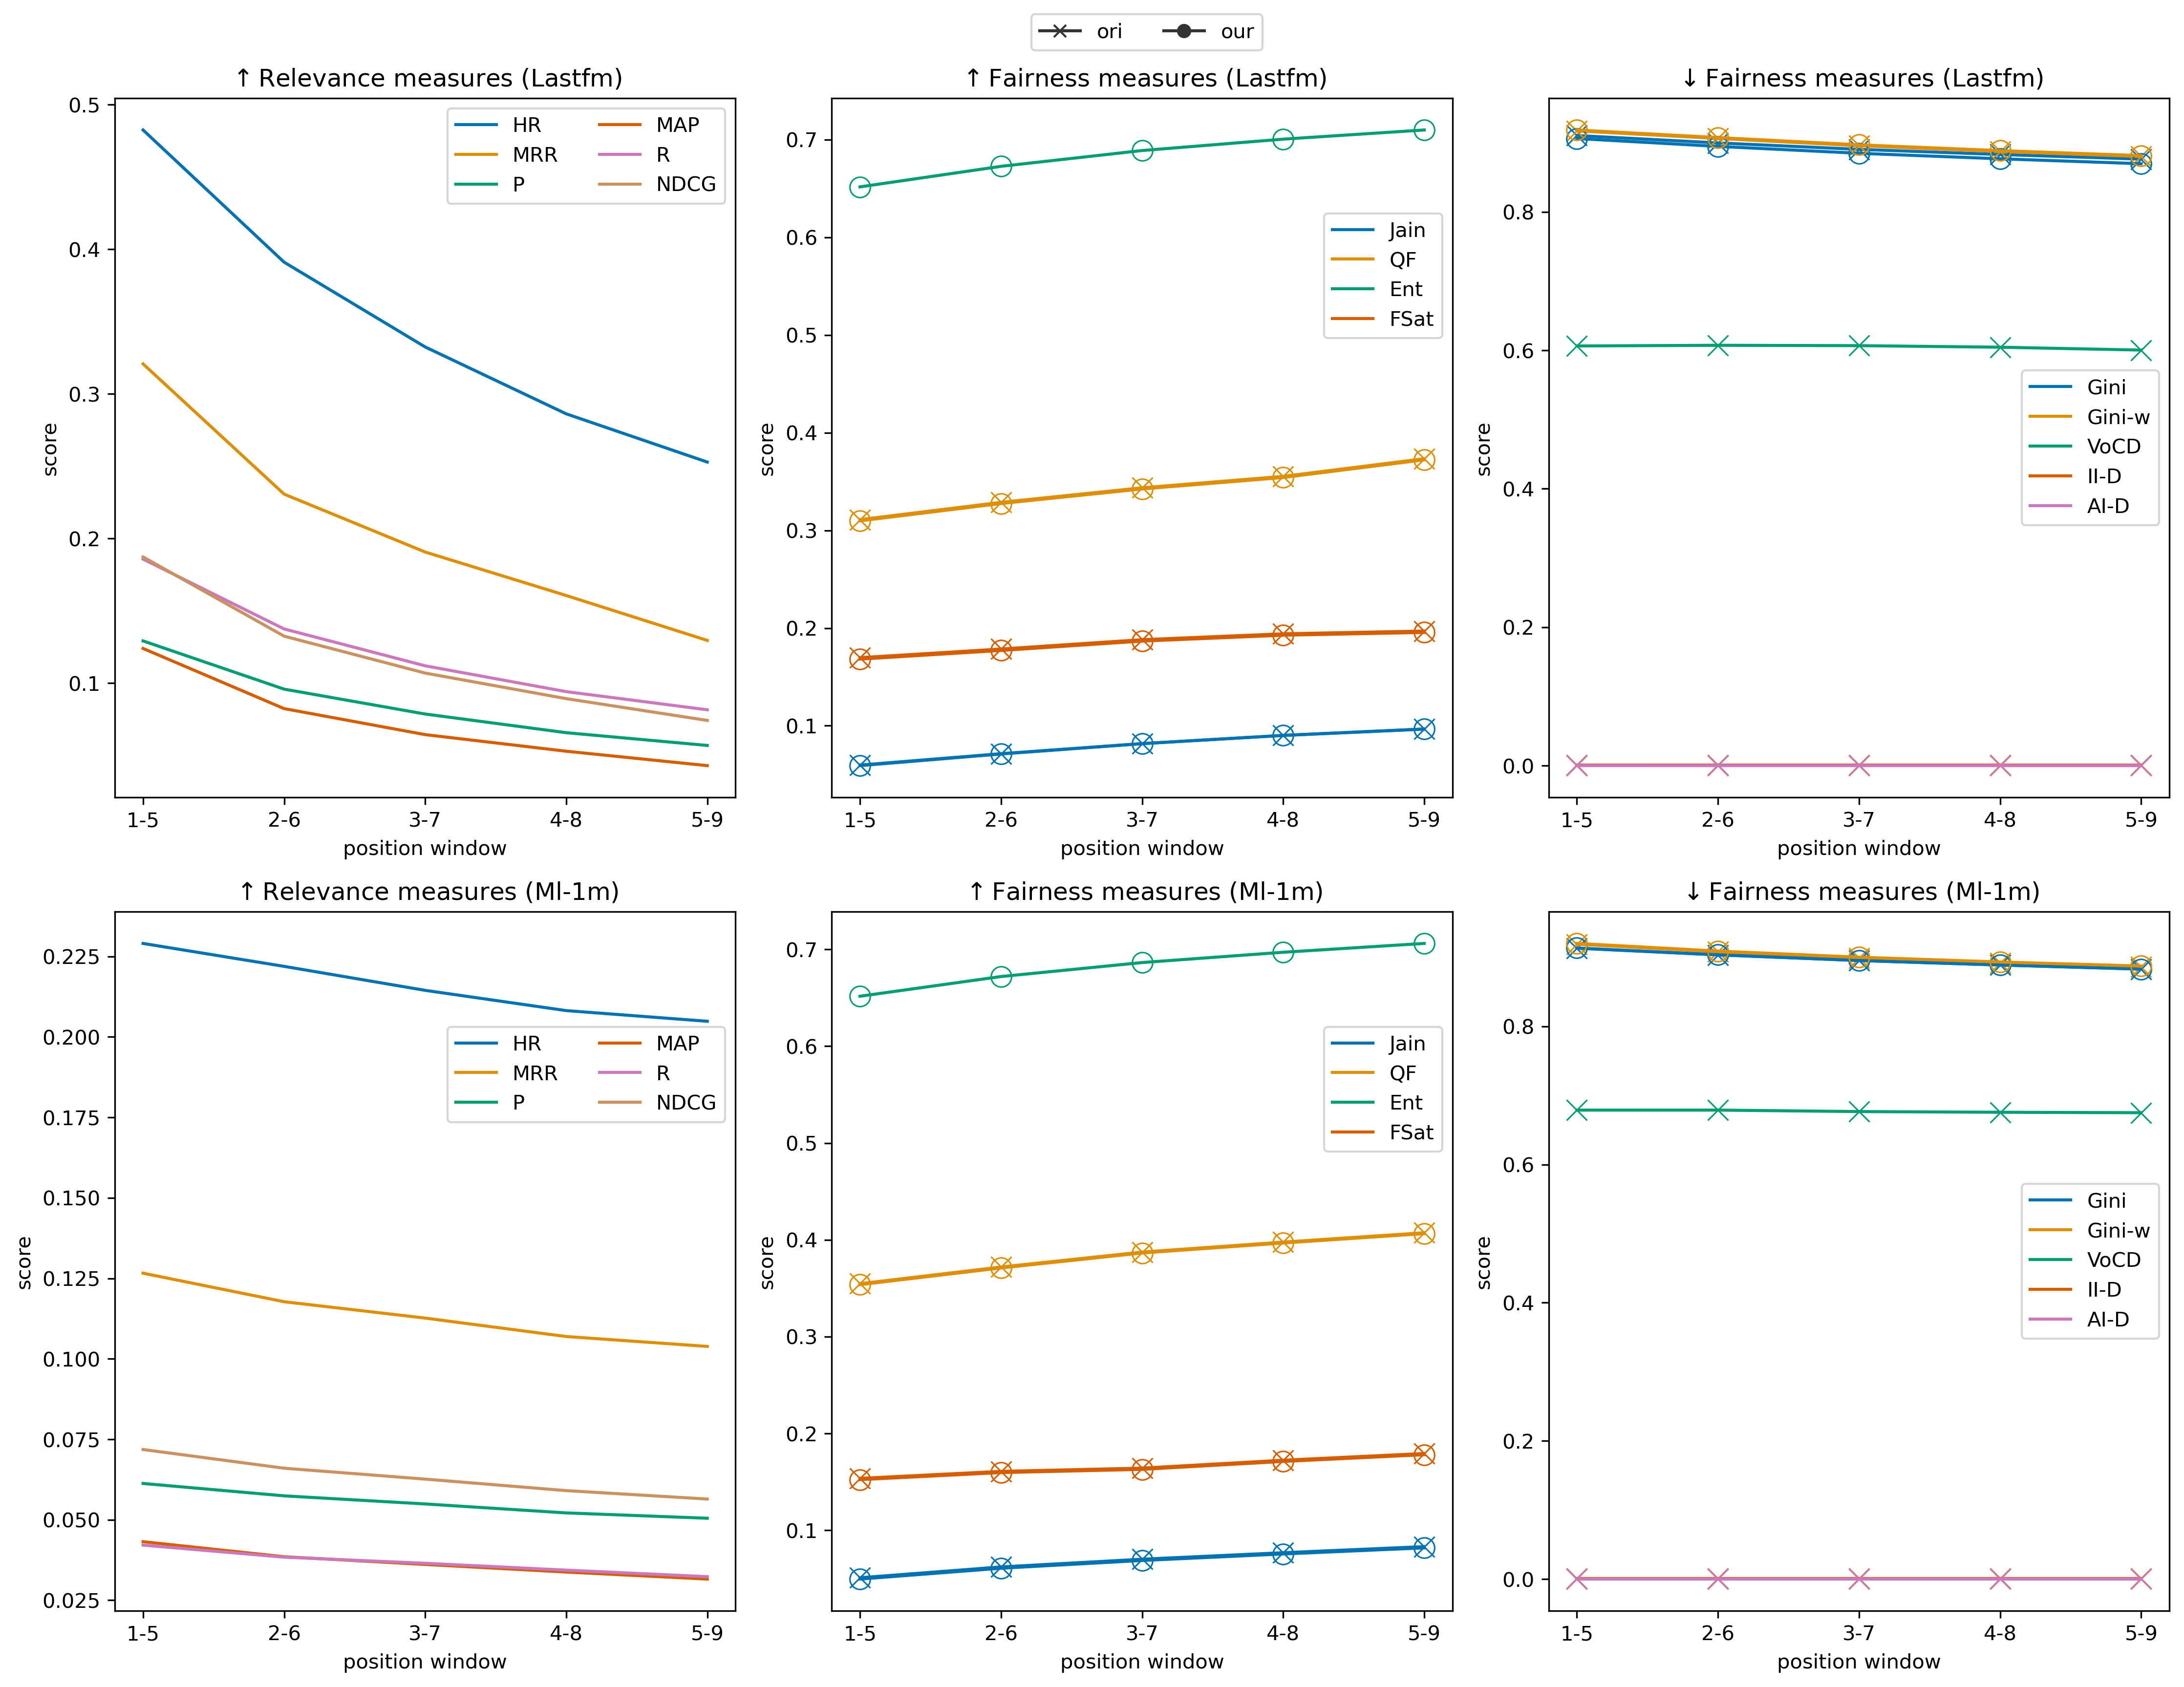

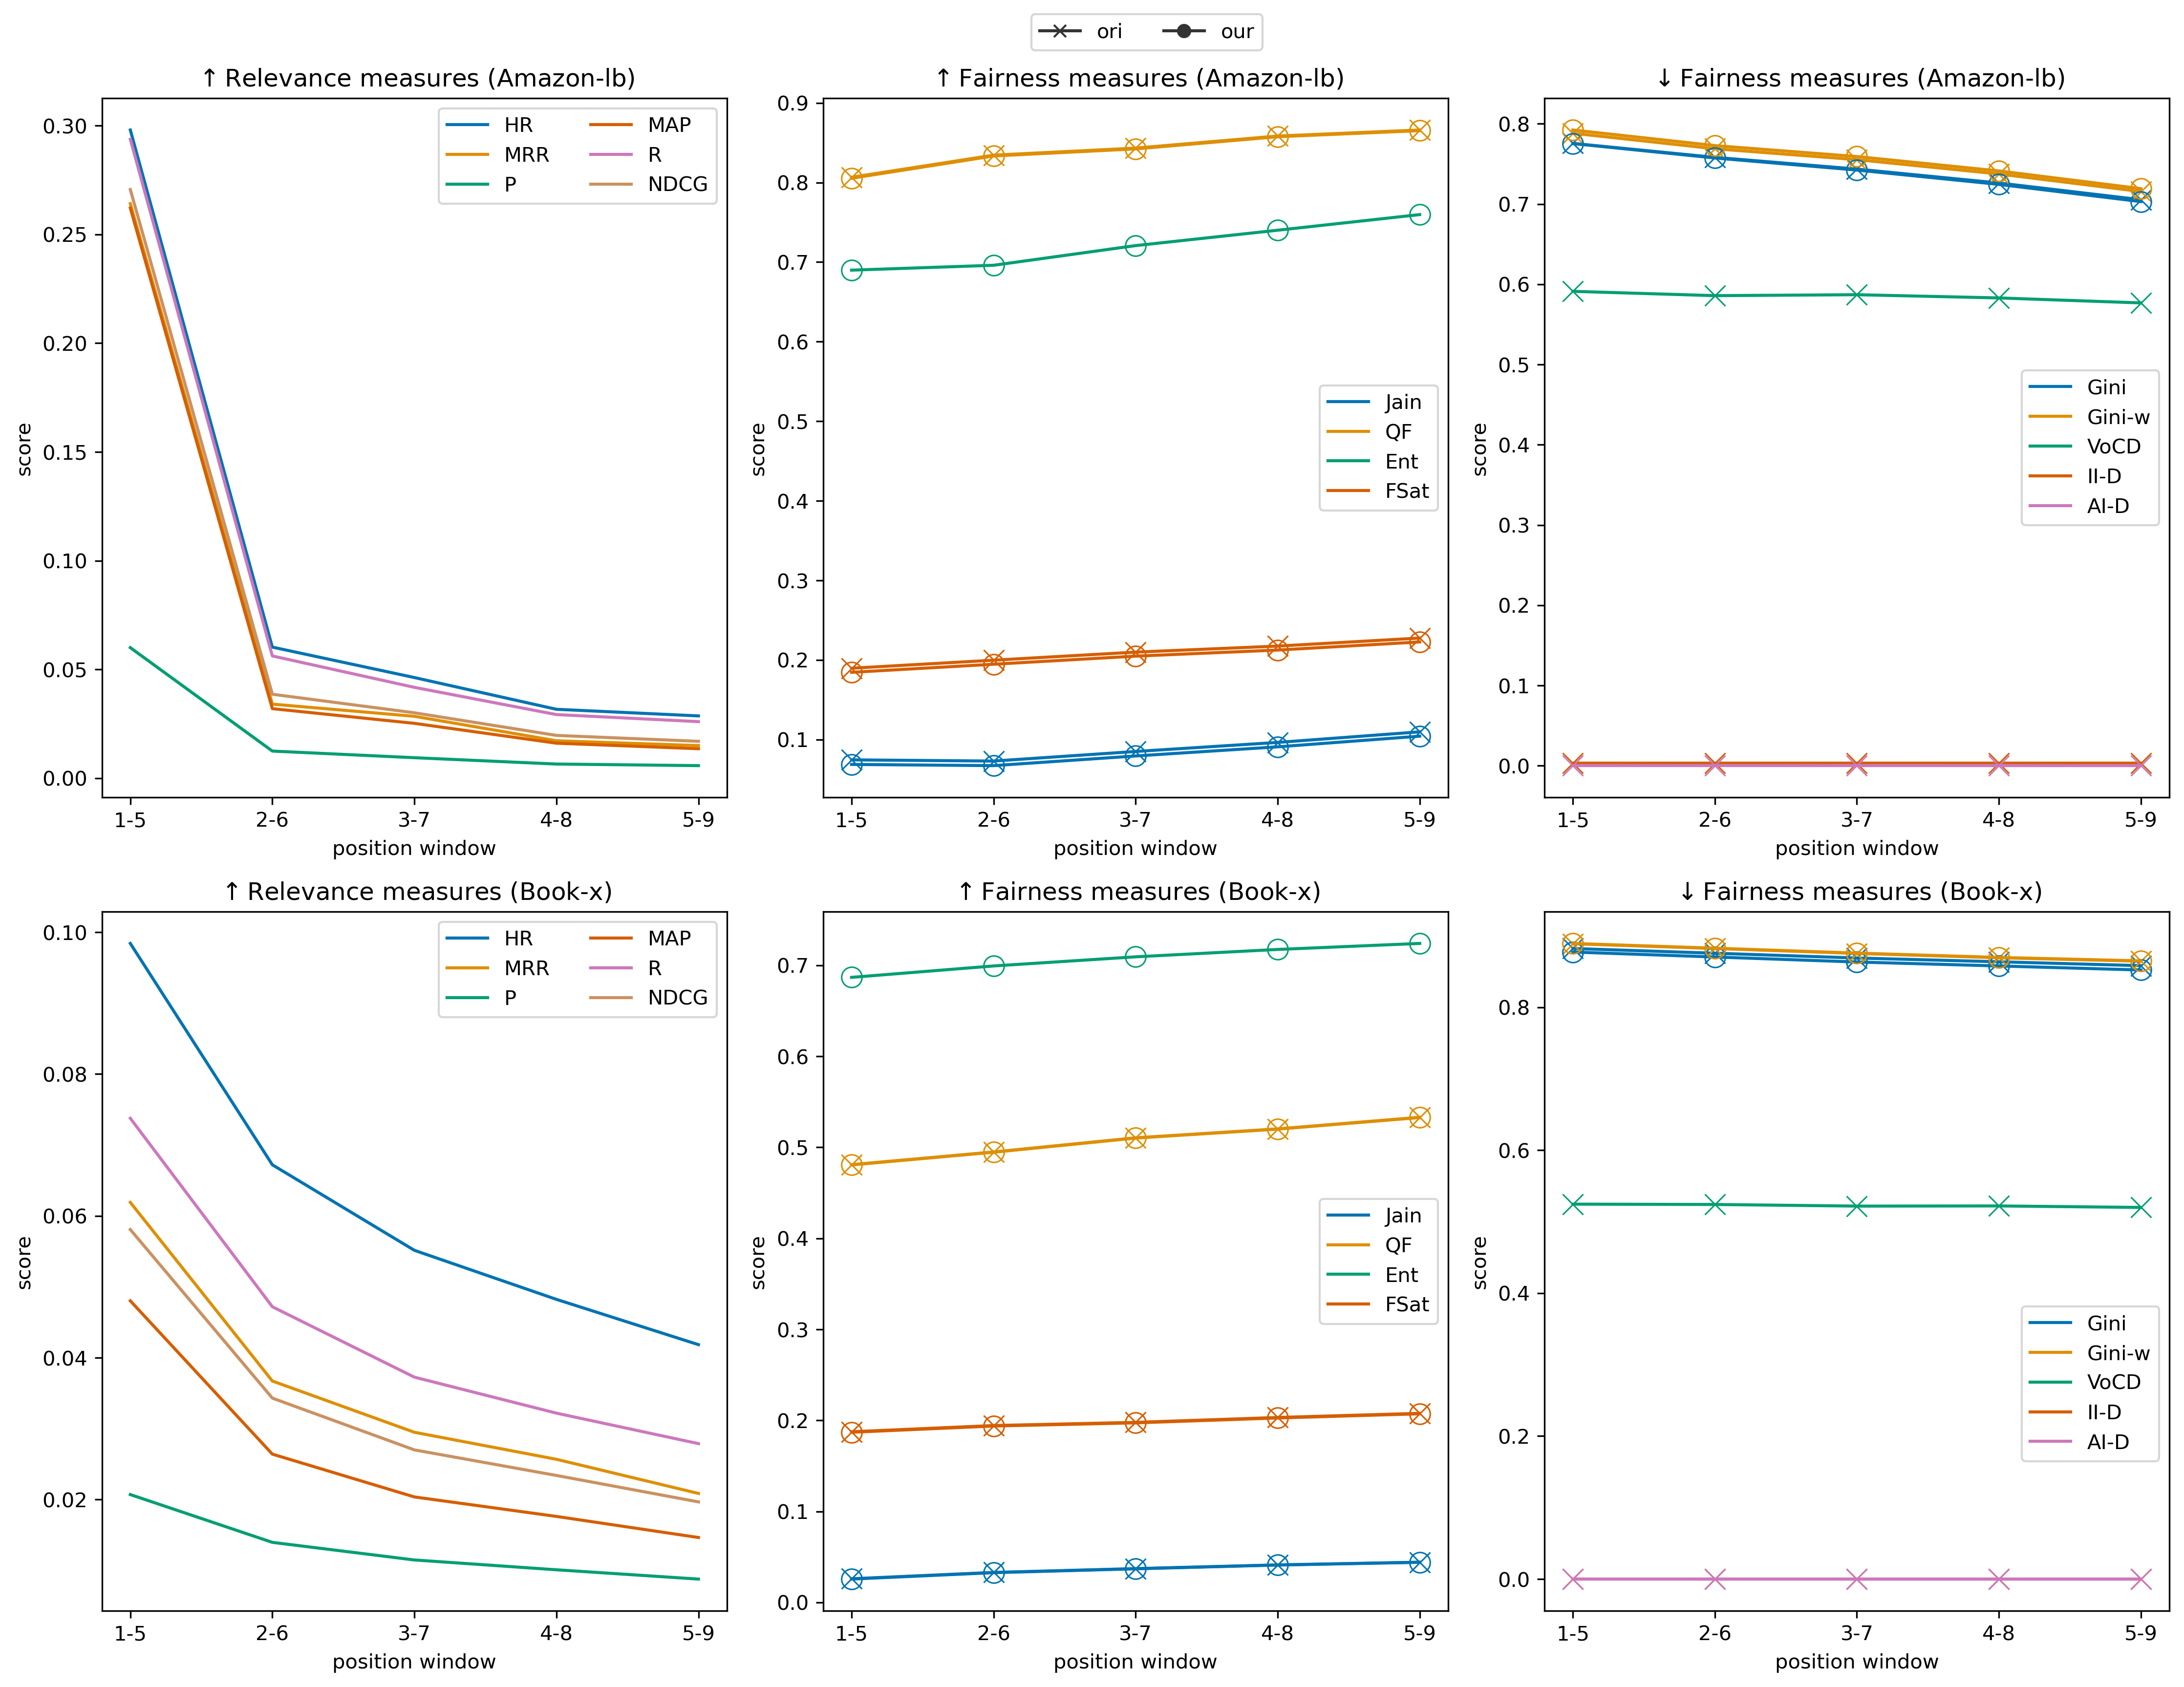

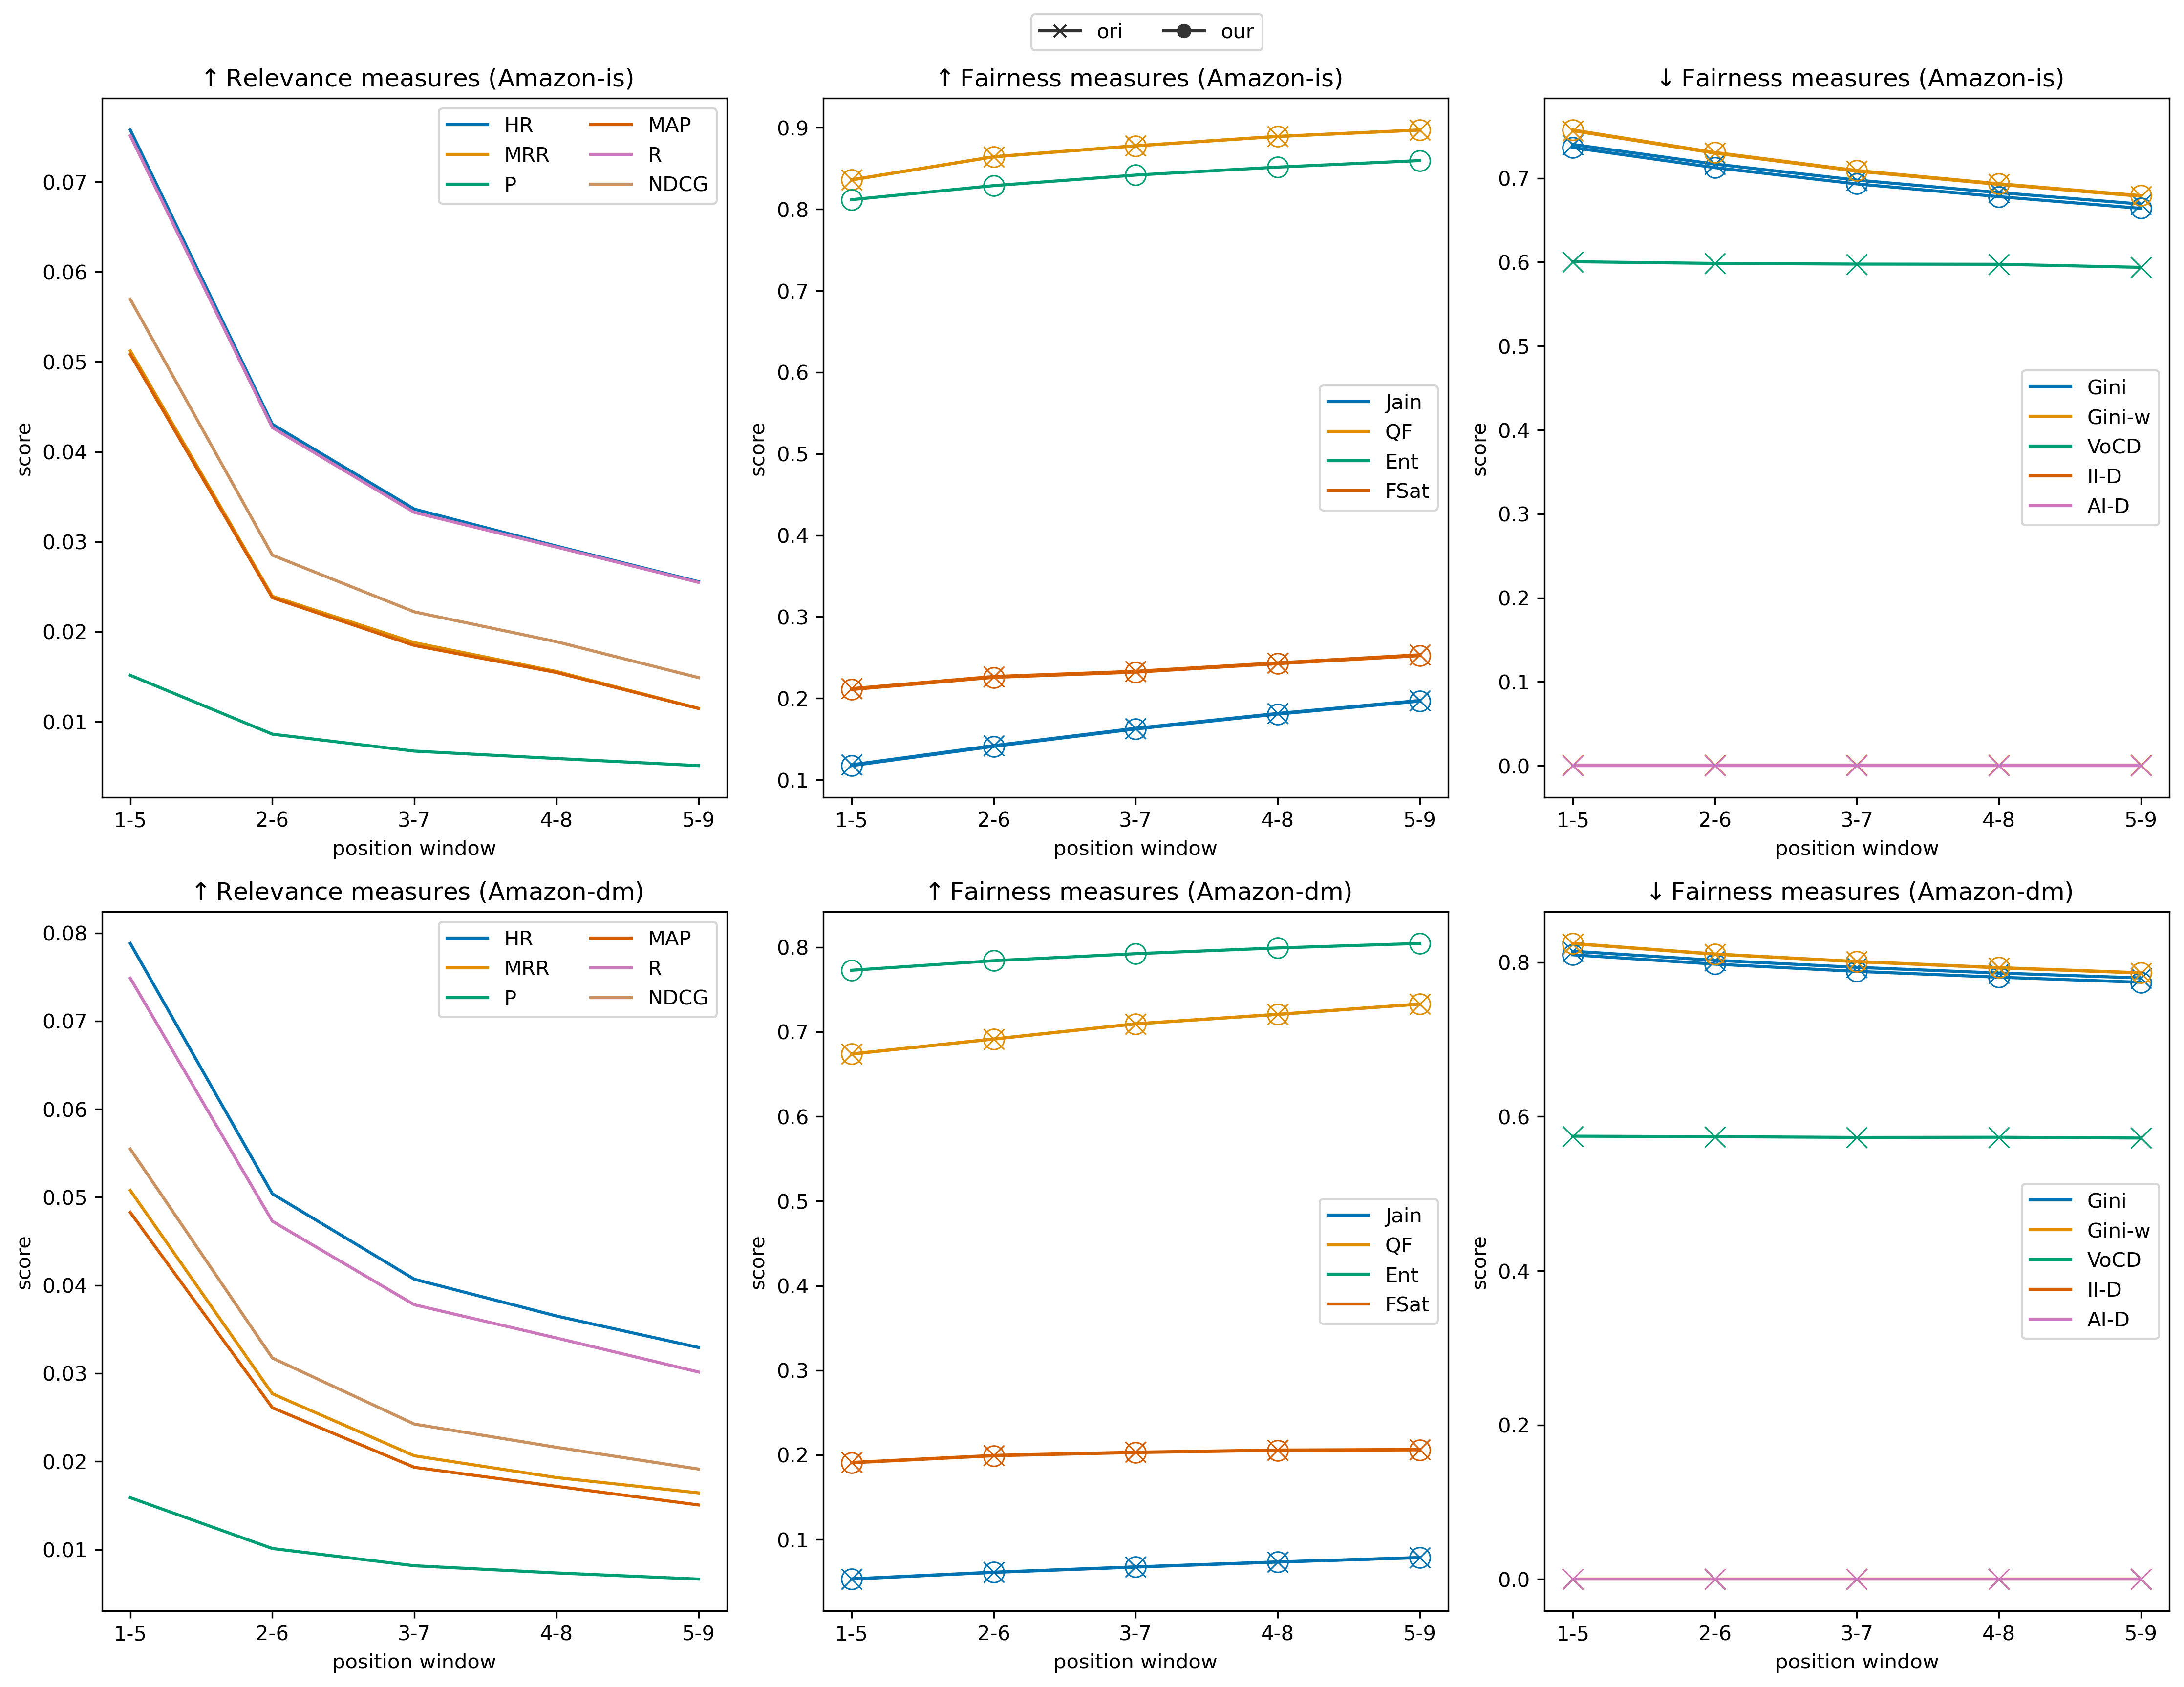

In [ ]:
for part, list_data in enumerate([
                                list(results.keys())[1:3],
                                ["Amazon_Luxury_Beauty","book-crossing"],
                                ["Amazon_Industrial_and_Scientific","Amazon_Digital_Music"]
                                ]):
    first_fig, ax= plt.subplots(2, 3, figsize=(15,15/4*3))

    for i, data in enumerate(list_data):
        
        thisdata = thetable.loc[data].loc["BPR"].round(10)
        if data == "Amazon_Luxury_Beauty":
            data = "amazon-lb"
        elif data == "book-crossing":
            data = "book-x"
        elif data == "Amazon_Industrial_and_Scientific":
            data = "amazon-is"
        elif data == "Amazon_Digital_Music":
            data = "amazon-dm"
        thisdata.index = thisdata.index.str.strip("@5")
        rel_result = thisdata.reindex(rel_measures)
        only_fair_result_higher = thisdata.reindex(only_fair_measures_higher_better)
        only_fair_result_lower = thisdata.reindex(only_fair_measures_higher_worse)

        df_rel_result = pd.DataFrame(rel_result.unstack()["val"]).reset_index()
        fair_higher = pd.DataFrame(only_fair_result_higher.unstack()["val"]).reset_index()
        fair_lower = pd.DataFrame(only_fair_result_lower.unstack()["val"]).reset_index()

        df_rel_result.columns = col_names
        fair_higher.columns = col_names
        fair_lower.columns = col_names


        splitted_fair_higher = fair_higher.measure.str.rsplit("_",1)
        fair_higher["version"] = [x[1] for x in splitted_fair_higher]

        splitted_fair_lower = fair_lower.measure.str.rsplit("_",1)
        fair_lower["version"] = [x[1] for x in splitted_fair_lower]

        fair_higher["measure"] = fair_higher["measure"].str.replace("_.*","")
        fair_lower["measure"] = fair_lower["measure"].str.replace("_.*","")
 

        #https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

        plotting_dict = {"x":"k", "y":"score", "hue":"measure", "palette":"colorblind","dashes":False}


        sns.lineplot(data=df_rel_result, ax=ax[i,0], **plotting_dict)
        for ver, marker in zip(["ori", "our"],["x","o"]):


            sns.lineplot(data=fair_higher.query("version==@ver"), ax=ax[i,1], style="version", markers=marker, **plotting_dict, **additional_plotting_dict)
            sns.lineplot(data=fair_lower.query("version==@ver"), ax=ax[i,2], style="version",  markers=marker, **plotting_dict,**additional_plotting_dict)

        ax[i,0].set_title(f"$\\uparrow$Relevance measures ({data.capitalize()})",)
        ax[i,1].set_title(f"$\\uparrow$Fairness measures ({data.capitalize()})",)
        ax[i,2].set_title(f"$\\downarrow$Fairness measures ({data.capitalize()})",)


        for j in range(3):
            ax[i,j].set_xlabel("position window") 


        ax[i,0].legend(ncol=2)

        handles, ori_labels = ax[i,1].get_legend_handles_labels()
        ax[i,1].legend(handles[1:5], ori_labels[1:5], ncol=1)
        handles, ori_labels = ax[i,2].get_legend_handles_labels()
        ax[i,2].legend(handles[1:6], ori_labels[1:6], ncol=1)



    # #takeout legend
    handles, ori_labels = ax_legend.get_legend_handles_labels()

    if part == 0:
        sns.move_legend(ax[0,1], "upper right", bbox_to_anchor=(1, 0.85))
        sns.move_legend(ax[1,0], "upper right", bbox_to_anchor=(1, .85), ncol=2)
        sns.move_legend(ax[1,1], "upper right", bbox_to_anchor=(1, .85))

    if part == 1:
        sns.move_legend(ax[1,2], "upper right", bbox_to_anchor=(1, .45)) # move legend for book-x, lower-is-better

    first_fig.legend(handles[-3:], ori_labels[-3:], 
            loc='upper center', 
            bbox_to_anchor=(0.525, 1.025), ncol=len(ori_labels)
            )

    plt.tight_layout()
    plt.show()


    filename = "_".join(list_data)
 
    first_fig.savefig(f"sliding/{filename}_nonfairrel.png",bbox_inches="tight")   
    first_fig.savefig(f"sliding/{filename}_nonfairrel.pdf",bbox_inches="tight")   